## Arbitrary Value Imputation

It consists of replacing NAN by an arbitrary value

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df, variable):
    df[variable+'_hundred']= df[variable].fillna(100)

##### Arbitrary values
#### 1. It should be more frequently values

##### Advantages 
1. Easy to implement
2. Captures the importance of missingness if there is one

##### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution 
3. Hard to decide which value to use

## Handling Categorical Missing Values
### Frequent Category Imputation

In [4]:
df= pd.read_csv('Datasets/loan_train.csv', usecols= ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
df.isna().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [7]:
## Compute the frequency with every feature

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:>

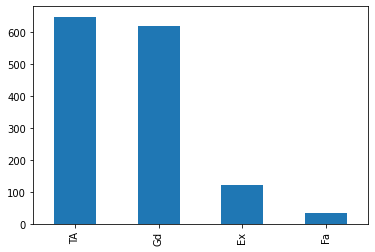

In [9]:
df['BsmtQual'].value_counts().plot.bar()

In [10]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [11]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [13]:
## Replacing Function
def impute_nan(df, variable,):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace= True)

In [14]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [15]:
df.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

##### Advantages 
1. Easy to implement
2. Faster way to implement 

##### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many NAN
2. It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [16]:
df= pd.read_csv('Datasets/loan_train.csv', usecols= ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df['BsmtQual_var']= np.where(df['BsmtQual'].isnull(),1, 0)

In [18]:
frequent= df['BsmtQual'].mode()[0]
frequent

'TA'

In [19]:
df['BsmtQual'].fillna(frequent, inplace= True)

In [20]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [21]:
df['FireplaceQu_var']= np.where(df['FireplaceQu'].isna(), 1, 0)
frequent1= df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent1, inplace= True)

##### Suppose if we have more frequent categrories, we just replace NAN with a new category(NAN is considered as a new category)

In [27]:
df= pd.read_csv('Datasets/loan_train.csv', usecols= ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
def impute_nan(df, variable):
    df[variable+'newvar']= np.where(df[variable].isna(), 'Missing', df[variable])

In [29]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [31]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
